In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [2]:
columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship', 'race', 'sex','capital-gain','capital-loss','hours-per-week','native-country','class']
data = pd.read_csv('adult.data.csv')
data.columns  = columns
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [3]:
#How many males and females are there?

data['sex'].value_counts()

 Male      21789
 Female    10771
Name: sex, dtype: int64

In [4]:
#What is the mean male age?

data[data.sex == " Male"].age.mean()

39.433567396392675

In [5]:
#What is the proportion of the US citizens?

US_citizens = data[data['native-country'] == ' United-States']
US_citizens_proportion = len(US_citizens) / len(data) * 100
print(US_citizens_proportion, '%')

89.58538083538083 %


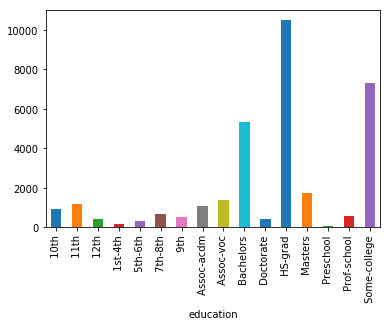

In [6]:
#Plot the distribution of people’s education as a bar plot.

plotbar = data.groupby('education').size()
plotbar.plot.bar()

In [7]:
#What is the mean and standard deviation of the ”final weight” for divorced people?

divorced_people = data[data["marital-status"] == " Divorced"]
print('mean deviation = ', divorced_people.fnlwgt.mean())
print('standart deviation = ', divorced_people.fnlwgt.std())

mean deviation =  185802.79045689848
standart deviation =  105646.78945933598


In [8]:
#Is it true that the people who receive over 50k are mostly highly educated?
receive_over_50k = data[data['class'] == ' >50K']
Bachelors = data[data['education'] == 'Bachelors']
Masters = data[data['education'] == 'Masters']
Doctorate = data[data['education'] == 'Doctorate']
highly_educated = len(Doctorate) + len(Masters) + len(Bachelors)
print('It is ', (highly_educated / len(receive_over_50k)) > 0.5)


It is  False


In [9]:
#What is the maximum male and female age for each race?

data.groupby(["race", "sex"]).age.max()

race                 sex    
 Amer-Indian-Eskimo   Female    80
                      Male      82
 Asian-Pac-Islander   Female    75
                      Male      90
 Black                Female    90
                      Male      90
 Other                Female    74
                      Male      77
 White                Female    90
                      Male      90
Name: age, dtype: int64

In [10]:
#The people from which countries work as farmers/fishers?

data[['occupation','native-country']]
data[data.occupation ==" Farming-fishing"].groupby('native-country').size()

native-country
 ?                  5
 Cambodia           1
 Canada             2
 Cuba               2
 El-Salvador        2
 England            1
 France             1
 Germany            1
 Guatemala          4
 Hong               1
 Ireland            1
 Italy              2
 Japan              1
 Mexico            77
 Philippines        4
 Poland             1
 Portugal           1
 Puerto-Rico        5
 United-States    879
 Vietnam            2
 Yugoslavia         1
dtype: int64

In [18]:
#Consider the ratio of the number of 1) male bachelors to male masters, and 2) female bachelors to female masters. Which one is higher?

male = data[data.sex==" Male"]
male_b = len(male[male.education ==" Bachelors"])
male_m = len(male[male.education==" Masters"])
female = data[data.sex ==" Female"]
female_b = len(female[female.education==" Bachelors"])
female_m = len(female[female.education==" Masters"])

if (male_b/male_m) > (female_b/female_m):
    print('male bachelors to male master is higher')
else:
    print('female bachelors to female master is higher')



male bachelors to male master is higher


In [19]:
#What is the largest number of hours a person works a week?

data['hours-per-week'].sort_values(ascending=False).head()
max(data['hours-per-week'])

99

In [20]:
#How many people who work this number of hours are there?
len(data[data['hours-per-week']==99])

85

In [21]:
#What is their income?
robotyagi = data[data['hours-per-week']==99]
print(robotyagi['capital-gain'])

934          0
1171         0
1886         0
3577         0
4085         0
4307         0
4440         0
5375         0
5431      2354
6617         0
6897         0
8071         0
8392         0
8653         0
8795     15024
9810         0
9830         0
10142        0
10265        0
10467        0
10985        0
11832        0
12208        0
12624        0
12787        0
13557        0
13579        0
13616     4416
13857        0
14592        0
         ...  
23225        0
23397        0
23648    15024
23829        0
24482        0
25353        0
25712        0
25805        0
25830        0
25985        0
26249        0
26595        0
26637        0
26857        0
27221        0
27763        0
27808        0
28111        0
29186        0
29750        0
29988     4386
30035    15024
30609        0
30753        0
30765        0
30991        0
31680        0
31698        0
32468        0
32530        0
Name: capital-gain, Length: 85, dtype: int64


In [22]:
robotyagi.groupby('capital-gain').size()

capital-gain
0        76
2354      1
2407      1
2907      1
4386      1
4416      1
6418      1
15024     3
dtype: int64